## Mini Project III

In [3]:
# Import necessary libraries 

import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sb
from sklearn import preprocessing

In [4]:
# Read CSV Files

customerdata = pd.read_csv("twm_customer.csv", sep=';')
accountdata = pd.read_csv("twm_accounts.csv", sep=';')
creditaccdata = pd.read_csv("twm_credit_acct.csv", sep=';')
checkingaccdata = pd.read_csv("twm_checking_acct.csv", sep=';')
savingaccdata = pd.read_csv("twm_savings_acct.csv", sep=';')

In [60]:
customerdata.head(20)

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
5,1362813,15684,53,3,2,F,2,,Terry ...,Eubanks ...,6999,Begonia ...,60654,Chicago,IL
6,1363017,0,16,1,0,M,1,,Tim ...,McMillen ...,10274,Mission Gorge ...,90095,Los Angeles,CA
7,1362609,1929,79,8,0,F,2,,Sandy ...,Rayhanian ...,6168,Camellia ...,96846,Honolulu,HI
8,1363486,39942,41,1,5,F,4,,Jill ...,Campbell ...,3830,Tenth ...,96802,Honolulu,HI
9,1363078,9622,46,6,1,M,2,Mr.,Christopher ...,McVicker ...,14382,Peach ...,96822,Honolulu,HI


In [157]:
# New data frame - income & age

customerdataIA = pd.read_csv("twm_customer.csv", usecols = ['income','marital_status'], sep=';')
customerdataIA.head()

,income,marital_status
0,26150,2
1,6605,2
2,18548,1
3,47668,1
4,44554,4


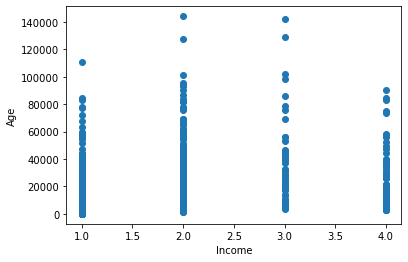

In [159]:
# Plot customerdata - income & age - NOT CLUSTERED

plt.scatter(customerdata['marital_status'],customerdata['income'])
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

In [160]:
# Make copy of customerdata

CDcopy = customerdataIA.copy()

In [161]:
# Clustering

kmeans = KMeans(5)
kmeans.fit(CDcopy)

KMeans(n_clusters=5)

In [162]:
# Clustering Result

clusters = CDcopy.copy()
clusters['cluster_pred'] = kmeans.fit_predict(CDcopy)

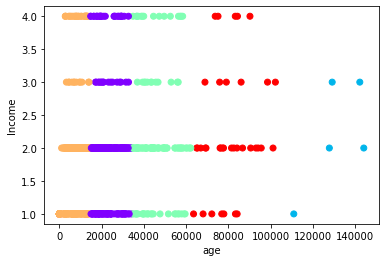

In [163]:
# Plot customerdata - income & age - CLUSTERED

plt.scatter(clusters['income'], clusters['marital_status'], c = clusters['cluster_pred'],cmap='rainbow')
plt.ylabel('Income')
plt.xlabel('age')
plt.show()

In [164]:
# Standardize variables

CDcopy_scaled = preprocessing.scale(CDcopy)
CDcopy_scaled

array([[ 0.1541846 ,  0.13214882],
       [-0.72652421,  0.13214882],
       [-0.18836584, -0.98961444],
       ...,
       [ 1.73806357,  0.13214882],
       [-0.34373468,  0.13214882],
       [-0.21869161, -0.98961444]])

In [165]:
# Elbow method

custElbow = []

for i in range(1,20):
    kmeans = KMeans(i)
    kmeans.fit(CDcopy_scaled)
    custElbow.append(kmeans.inertia_)
    
custElbow

C:\Users\Matthew Wong\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[1494.0000000000023,
 891.8681818955673,
 553.8531537309751,
 374.4928369381684,
 273.24326893139556,
 223.98921245861447,
 183.587253348208,
 149.760923808418,
 125.71609395934165,
 107.6711972828323,
 91.68563520911178,
 79.4306140991661,
 68.85475875532074,
 58.469627636604955,
 53.025645901202346,
 45.13950296259482,
 39.697936302089246,
 36.70344089074812,
 33.69206323733761]

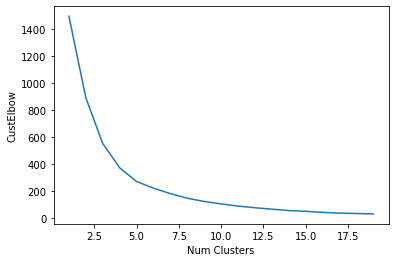

In [166]:
# Plot Elbow method

plt.plot(range(1,20), custElbow)
plt.xlabel('Num Clusters')
plt.ylabel('CustElbow')
plt.show()

In [172]:
kmeans_new = KMeans(4)
kmeans.fit(CDcopy_scaled)
cluster_new = CDcopy
cluster_new['cluster_pred'] = kmeans_new.fit_predict(CDcopy_scaled)
cluster_new

,income,marital_status,cluster_pred
0,26150,2,1
1,6605,2,1
2,18548,1,3
3,47668,1,2
4,44554,4,0
...,...,...,...
742,14795,4,0
743,26387,2,1
744,61300,2,2
745,15100,2,1


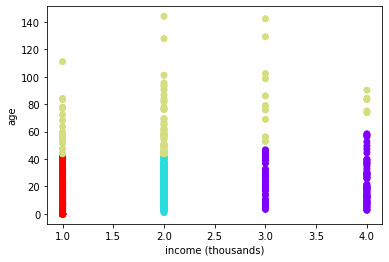

In [173]:
plt.scatter(cluster_new['marital_status'],cluster_new['income'].divide(1000),c=cluster_new['cluster_pred'],cmap='rainbow')
plt.ylabel('age')
plt.xlabel('income (thousands)')
plt.show()

In [10]:
customerdata.head(20)

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
5,1362813,15684,53,3,2,F,2,,Terry ...,Eubanks ...,6999,Begonia ...,60654,Chicago,IL
6,1363017,0,16,1,0,M,1,,Tim ...,McMillen ...,10274,Mission Gorge ...,90095,Los Angeles,CA
7,1362609,1929,79,8,0,F,2,,Sandy ...,Rayhanian ...,6168,Camellia ...,96846,Honolulu,HI
8,1363486,39942,41,1,5,F,4,,Jill ...,Campbell ...,3830,Tenth ...,96802,Honolulu,HI
9,1363078,9622,46,6,1,M,2,Mr.,Christopher ...,McVicker ...,14382,Peach ...,96822,Honolulu,HI


In [5]:
accountdata.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [13]:
creditaccdata.head(1000)

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00
...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00


In [7]:
checkingaccdata.head()

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.00,Y,11.11.1986,NaN,6004.34,569.65
1,1362487,13624872,3000,0.00,Y,12.1.1995,NaN,2781.07,1401.21
2,1363017,13630172,3000,0.00,Y,19.3.1994,NaN,2694.91,147.15
3,1362752,13627522,100,0.15,Y,8.1.1994,NaN,487.69,3.76
4,1363282,13632822,100,0.15,Y,5.3.1988,NaN,133.90,84.18


In [11]:
savingaccdata.head(20)

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35
5,1362609,13626093,500,MM,Y,22.6.1995,NaN,758.41,49.39
6,1363465,13634653,500,MM,Y,27.4.1994,NaN,573.48,590.92
7,1363078,13630783,100,BS,Y,26.8.1992,NaN,127.81,596.38
8,1362588,13625883,100,BS,Y,20.10.1990,NaN,252.24,9.71
9,1363343,13633433,500,MM,Y,14.3.1995,NaN,603.82,2007.65
